In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_palette('twilight')

#### Loading GSAT outputs

In [2]:
gsat_columns = ["gsat num_of_iterations", "max_num_of_iterations", "gsat num_of_solved_clauses", "num_of_clauses"]

gsat_results_20 = pd.read_csv('results/20_g_sat_results.txt', sep=" ", header=None)
gsat_results_20.columns = gsat_columns

gsat_results_50 = pd.read_csv('results/50_g_sat_results.txt', sep=" ", header=None)
gsat_results_50.columns = gsat_columns

gsat_results_75 = pd.read_csv('results/75_g_sat_results.txt', sep=" ", header=None)
gsat_results_75.columns = gsat_columns

gsat_results = pd.concat([gsat_results_20, gsat_results_50, gsat_results_75])
gsat_results

,gsat num_of_iterations,max_num_of_iterations,gsat num_of_solved_clauses,num_of_clauses
0,7,10000,91,91
1,12,10000,91,91
2,10,10000,91,91
3,292,10000,91,91
4,7,10000,91,91
...,...,...,...,...
9999995,3252,10000,325,325
9999996,8229,10000,325,325
9999997,6921,10000,325,325
9999998,5295,10000,325,325


The maximum number of iterations was constantly set to 10000, so we may delete this column.

In [3]:
gsat_results = gsat_results.drop(columns=['max_num_of_iterations'])

In [4]:
gsat_results.nunique()

gsat num_of_iterations        10001
gsat num_of_solved_clauses       49
num_of_clauses                    3
dtype: int64

#### Loading ProbSAT outputs

In [5]:
probsat_columns = ['c number of variables', 'c number of literals', 'c number of clauses', 
                   'c max. clause length', 'c cb', 'c eps', 'c maxTries', 'c maxFlips',
                   'probsat num_of_flips', 'probsat avg_num_of_flips/variable', 'probsat avg_num_of_flips/clause']

probsat_results_20 = pd.read_csv('results/20_prob_sat_results.txt', sep=",", header=None)
probsat_results_20.columns = probsat_columns

probsat_results_50 = pd.read_csv('results/50_prob_sat_results.txt', sep=",", header=None)
probsat_results_50.columns = probsat_columns

probsat_results_75 = pd.read_csv('results/75_prob_sat_results.txt', sep=",", header=None)
probsat_results_75.columns = probsat_columns

probsat_results = pd.concat([probsat_results_20, probsat_results_50, probsat_results_75])
probsat_results

,c number of variables,c number of literals,c number of clauses,c max. clause length,c cb,c eps,c maxTries,c maxFlips,probsat num_of_flips,probsat avg_num_of_flips/variable,probsat avg_num_of_flips/clause
0,20,40,91,3,2.300,1.000,10000,9223372036854775807,49,2.450,0.540
1,20,40,91,3,2.300,1.000,10000,9223372036854775807,11,0.550,0.120
2,20,40,91,3,2.300,1.000,10000,9223372036854775807,67,3.350,0.740
3,20,40,91,3,2.300,1.000,10000,9223372036854775807,37,1.850,0.410
4,20,40,91,3,2.300,1.000,10000,9223372036854775807,104,5.200,1.140
...,...,...,...,...,...,...,...,...,...,...,...
9999995,75,150,325,3,2.300,1.000,10000,9223372036854775807,1693,22.570,5.210
9999996,75,150,325,3,2.300,1.000,10000,9223372036854775807,2159,28.790,6.640
9999997,75,150,325,3,2.300,1.000,10000,9223372036854775807,13030,173.730,40.090
9999998,75,150,325,3,2.300,1.000,10000,9223372036854775807,791,10.550,2.430


Some of the columns contains not important information, as most of the parameters have been set before to the next values:

- number of variables differ (20, 50 or 75)
- number of binary literals correlates with the variables (40, 100 and 150)
- maximum clause length is always 3, as we are solving 3-SAT problems
- cb = 2.3 (due to the task)
- eps = 1.0 (some small number to protect us from division by 0) 
- maxTries was set to 10000
- maxFlips is inf. (9223372036854775807)

These columns are deleted in the next step.

In [6]:
probsat_results = probsat_results.drop(columns=['c number of clauses', 'c number of variables','c number of literals', 
                                                'c max. clause length', 'c cb', 'c eps', 'c maxTries', 'c maxFlips'])

In [7]:
probsat_results.nunique()

probsat num_of_flips                 750
probsat avg_num_of_flips/variable    882
probsat avg_num_of_flips/clause      564
dtype: int64

#### Combining output data

Due to the fact that all of the outputs were generated step by step in the same order - we may combine them into one dataframe, so it will be easier to work all of the outputs out.

In [8]:
results = pd.concat([gsat_results, probsat_results], axis=1)
results

,gsat num_of_iterations,gsat num_of_solved_clauses,num_of_clauses,probsat num_of_flips,probsat avg_num_of_flips/variable,probsat avg_num_of_flips/clause
0,7,91,91,49,2.450,0.540
1,12,91,91,11,0.550,0.120
2,10,91,91,67,3.350,0.740
3,292,91,91,37,1.850,0.410
4,7,91,91,104,5.200,1.140
...,...,...,...,...,...,...
9999995,3252,325,325,1693,22.570,5.210
9999996,8229,325,325,2159,28.790,6.640
9999997,6921,325,325,13030,173.730,40.090
9999998,5295,325,325,791,10.550,2.430


On the contrast to the ProbSAT, GSAT did not find a solution to each problem, as it has limited number of iterations. In this section we will check how many problems remains unsolved. Also, we will test how many out-of-the-limit steps the ProbSAT algorithm made.

#### Checking unsolved problems

<AxesSubplot: title={'center': 'Number of different clauses'}>

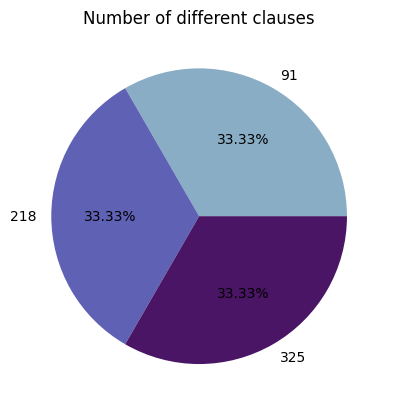

In [9]:
results['num_of_clauses'].value_counts().plot(autopct='%.2f%%', kind='pie', ylabel = "", title = "Number of different clauses")

In [10]:
results['gsat num_of_solved_clauses'].value_counts().sort_values(ascending = False)

91     9999805
218    9444612
325    7913436
324     699647
323     608305
322     352600
217     214394
321     200980
216     155049
320     109992
215      86978
319      57707
214      47880
318      29297
213      25676
317      14581
212      13117
316       7193
211       6580
315       3372
210       3063
314       1599
209       1447
313        718
208        674
312        323
207        296
311        131
206        128
90          84
310         74
205         66
89          53
88          27
309         26
204         23
87          15
308         14
203         11
85           7
86           5
307          4
201          2
200          2
84           2
83           2
199          1
202          1
306          1
Name: gsat num_of_solved_clauses, dtype: int64

Text(0.5, 1.0, 'Ratio of ProbSAT unsolved clauses')

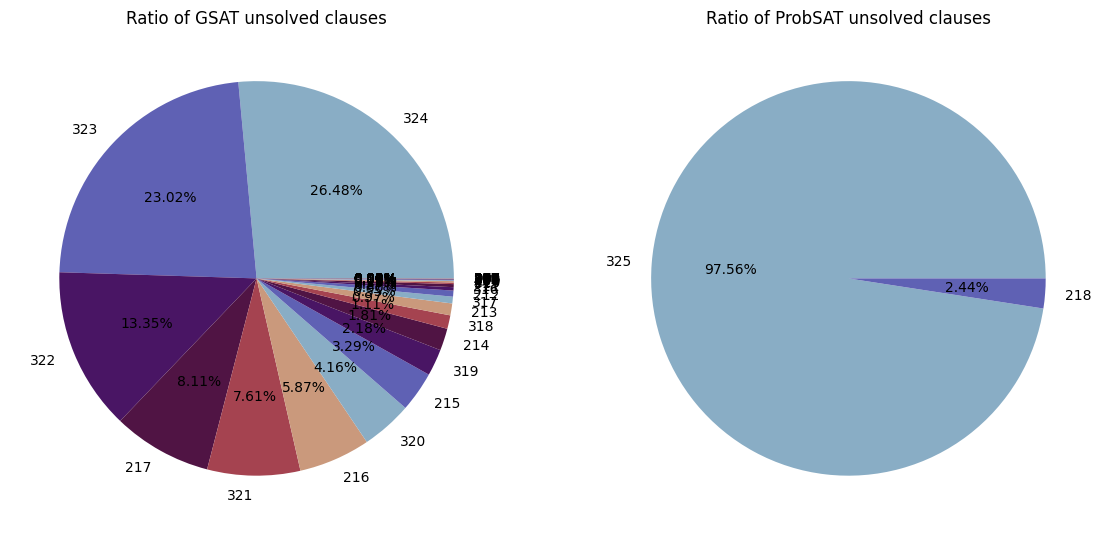

In [11]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(14, 10)

results[(results['gsat num_of_solved_clauses'] != 91) &
        (results['gsat num_of_solved_clauses'] != 218) &
        (results['gsat num_of_solved_clauses'] != 325)]['gsat num_of_solved_clauses']\
.value_counts().plot(subplots=True, autopct='%.2f%%', kind='pie', ylabel = "", ax=axs[0])
axs[0].set_title("Ratio of GSAT unsolved clauses")

results[(results['probsat num_of_flips'] > 10000)]["num_of_clauses"]\
.value_counts().plot(subplots=True, autopct='%.2f%%', kind='pie', ylabel = "", ax=axs[1])
axs[1].set_title("Ratio of ProbSAT unsolved clauses")

For the future examination only successful solutions are needed.

In [12]:
old = results.shape[0]
results = results[((results['gsat num_of_solved_clauses'] == 91) | 
                  (results['gsat num_of_solved_clauses'] == 218) | 
                  (results['gsat num_of_solved_clauses'] == 325)) &
                  (results['probsat num_of_flips'] < 10000)]
num_of_del_rows = old-results.shape[0]
percento_del_rows = np.round(num_of_del_rows/old*100, decimals=2)
print(f"Number of deleted rows: {num_of_del_rows} ({percento_del_rows}%)")

Number of deleted rows: 2793606 (9.31%)


<AxesSubplot: title={'center': 'Number of different clauses'}>

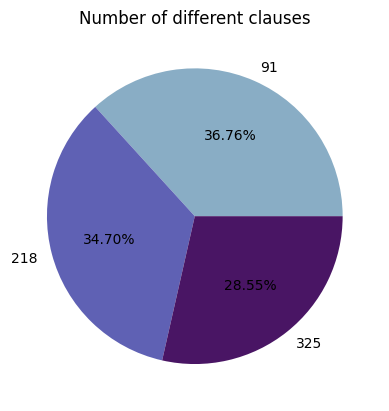

In [13]:
results['num_of_clauses'].value_counts().plot(autopct='%.2f%%', kind='pie', ylabel = "", title = "Number of different clauses")

#### Examination between differents among number of iterations and flips

<AxesSubplot: xlabel='index', ylabel='Difference between ProbSAT flips and GSAT iterations'>

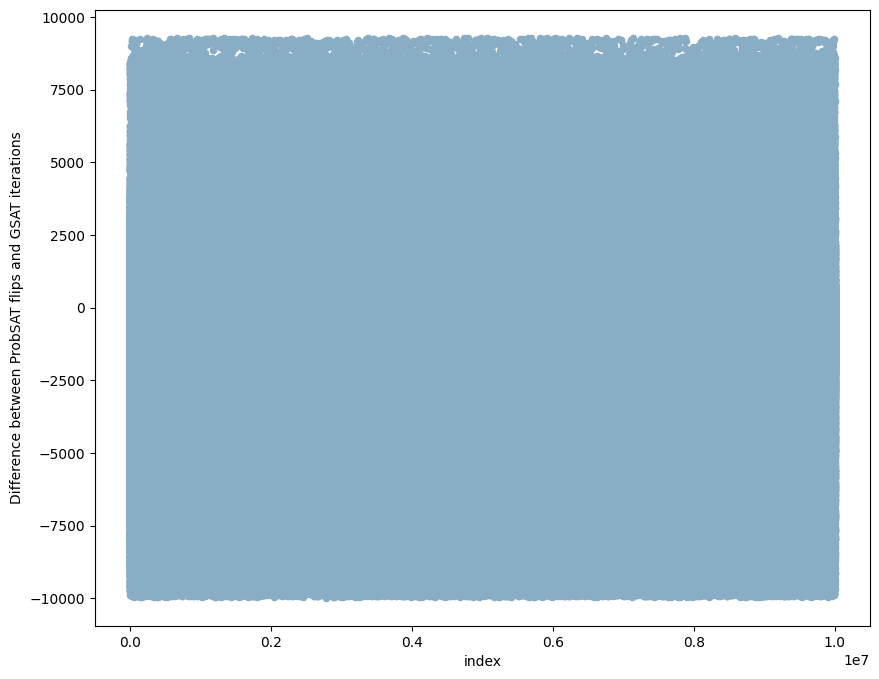

In [25]:
diff_columns = results[["num_of_clauses", "probsat num_of_flips","gsat num_of_iterations"]]
diff_df = diff_columns.copy()
diff_df["Difference between ProbSAT flips and GSAT iterations"] = results["probsat num_of_flips"] - results["gsat num_of_iterations"]
diff_df.reset_index().plot(figsize=(10,8), kind="scatter", x="index", y="Difference between ProbSAT flips and GSAT iterations")

As we can see the is no correlation between steps and difference of two algorithms. However, it may depend on the number of clauses (see below):

[Text(0.5, 1.0, 'Difference between ProbSAT flips and GSAT iterations'),
 Text(0, 0.5, 'number of iterations | flips')]

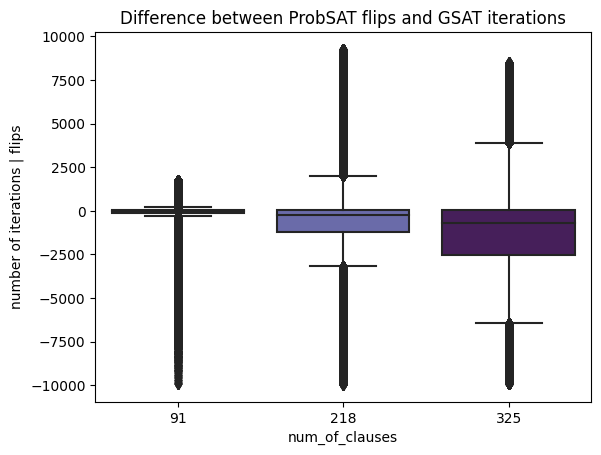

In [31]:
sns.boxplot(x="num_of_clauses", y="Difference between ProbSAT flips and GSAT iterations", data=diff_df).\
set(title='Difference between ProbSAT flips and GSAT iterations', ylabel="number of iterations | flips")

Text(0.5, 1.0, 'ProbSAT')

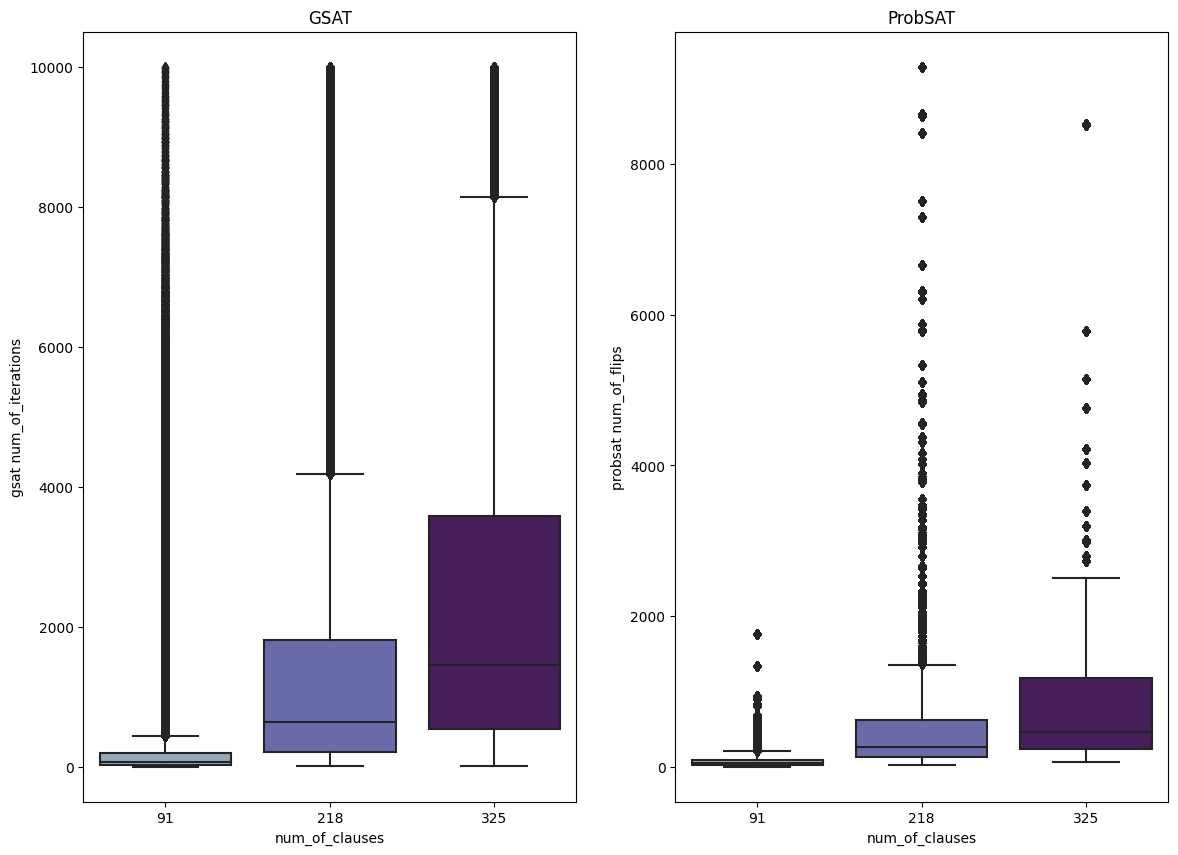

In [32]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(14, 10)

sns.boxplot(x="num_of_clauses", y="gsat num_of_iterations", data=results, ax=axs[0])
axs[0].set_title("GSAT")

sns.boxplot(x="num_of_clauses", y="probsat num_of_flips", data=results, ax=axs[1])
axs[1].set_title("ProbSAT")

#### Comparison of the iteration progress

C:\Users\Nastia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)
C:\Users\Nastia\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


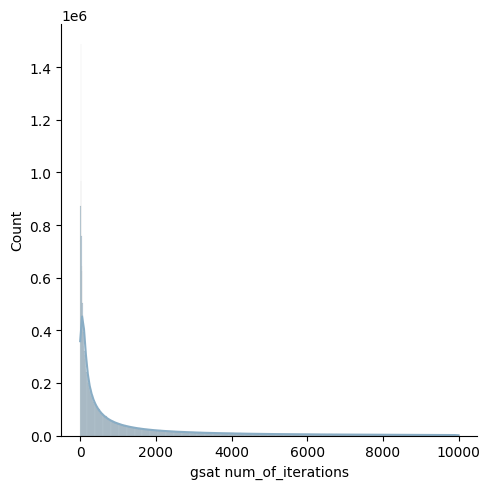

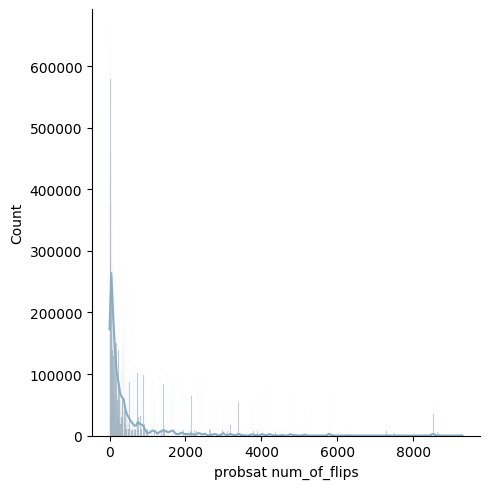

In [89]:
sns.displot(data=results, x="gsat num_of_iterations", kde=True, ax=axs[0])
sns.displot(data=results, x="probsat num_of_flips", kde=True, ax=axs[1])

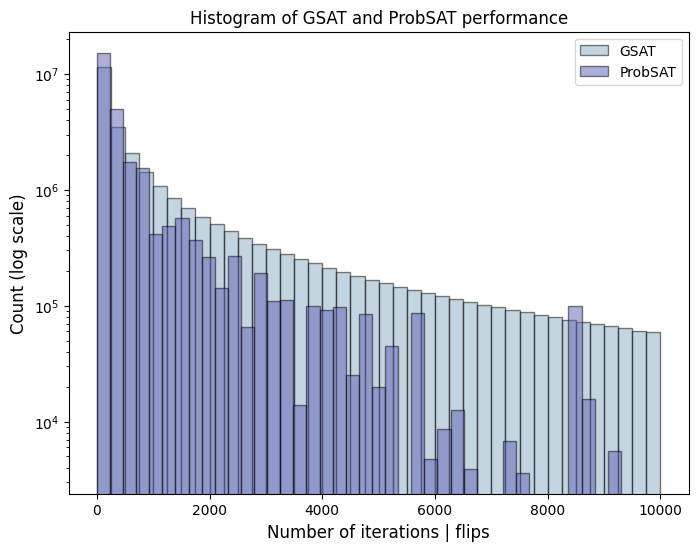

In [68]:
plt.figure(figsize=(8,6))
_ = plt.hist(results["gsat num_of_iterations"], bins=40, alpha=0.5, label="GSAT", edgecolor="black")
_ = plt.hist(results["probsat num_of_flips"], bins=40, alpha=0.5, label="ProbSAT", edgecolor="black")
plt.yscale("log")

plt.xlabel("Number of iterations | flips", size=12)
plt.ylabel("Count (log scale)", size=12)
plt.title("Histogram of GSAT and ProbSAT performance")
plt.legend(loc='upper right')

#### Comparison of the average values

In [35]:
selected_columns = results[["probsat avg_num_of_flips/variable","probsat avg_num_of_flips/clause"]]
avg_results = selected_columns.copy()

avg_results["gsat avg_num_of_iterations/clause"] = results["gsat num_of_iterations"]/results["num_of_clauses"]

conditions = [(results["num_of_clauses"] == 91), (results["num_of_clauses"] == 218), (results["num_of_clauses"] == 325)]
choices_v = [results["gsat num_of_iterations"]/20, results["gsat num_of_iterations"]/50, results["gsat num_of_iterations"]/75]
g_choices_cv = [results["gsat num_of_iterations"]/4.55, results["gsat num_of_iterations"]/4.36, results["gsat num_of_iterations"]/4.33]
p_choices_cv = [results["probsat num_of_flips"]/4.55, results["probsat num_of_flips"]/4.36, results["probsat num_of_flips"]/4.33]

avg_results["gsat avg_num_of_iterations/variable"] = np.select(conditions, choices_v)

avg_results["gsat avg_num_of_iterations/(clauses/variable)"] = np.select(conditions, g_choices_cv)
avg_results["probsat avg_num_of_iterations/(clauses/variable)"] = np.select(conditions, p_choices_cv)

results = results.drop(columns=["probsat avg_num_of_flips/variable","probsat avg_num_of_flips/clause", "gsat num_of_solved_clauses"])

In [36]:
results.describe()

,gsat num_of_iterations,num_of_clauses,probsat num_of_flips
count,27206394.000,27206394.000,27206394.000
mean,1256.075,201.865,532.717
std,1964.705,94.531,1024.741
min,0.000,91.000,1.000
25%,84.000,91.000,58.000
50%,375.000,218.000,173.000
75%,1468.000,325.000,490.000
max,10000.000,325.000,9297.000


In [37]:
avg_results.describe()

,probsat avg_num_of_flips/variable,probsat avg_num_of_flips/clause,gsat avg_num_of_iterations/clause,gsat avg_num_of_iterations/variable,gsat avg_num_of_iterations/(clauses/variable),probsat avg_num_of_iterations/(clauses/variable)
count,27206394.000,27206394.000,27206394.000,27206394.000,27206394.000,27206394.000
mean,9.686,2.212,5.152,22.546,288.540,122.337
std,16.442,3.777,7.398,32.275,452.788,236.186
min,0.050,0.000,0.000,0.000,0.000,0.220
25%,1.760,0.400,0.583,2.600,18.707,12.747
50%,4.150,0.940,2.018,8.900,85.275,39.450
75%,9.740,2.220,6.352,27.860,336.927,111.468
max,185.940,42.650,109.879,499.950,2309.469,2132.339


#### PDF (probability density function) and CDF (cumulative distribution function)

PDF marks the probability that some random variable may have a certain value. For a continuous variables PDF is zero.

CDF marks the probability that some random variable may have a value less than or equal to a certain value.

In [44]:
def count_distribution(column_name):
    df = results.groupby(column_name)[column_name].agg('count').pipe(pd.DataFrame).rename(columns = {column_name: 'frequency'})
    df['pdf'] = df['frequency'] / sum(df['frequency'])
    df['cdf'] = df['pdf'].cumsum()
    return df.reset_index()

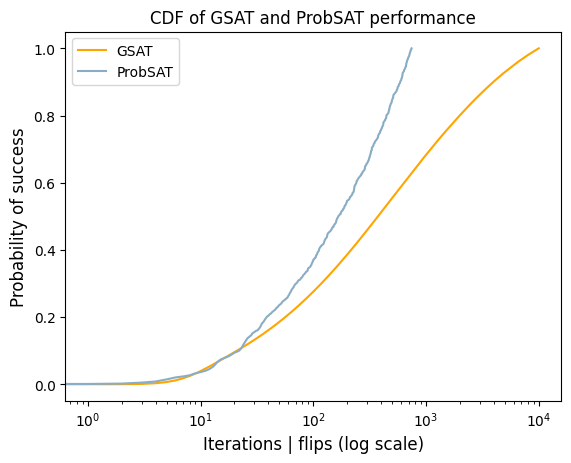

In [88]:
df_gsat = count_distribution('gsat num_of_iterations')
df_probsat = count_distribution('probsat num_of_flips')

df_gsat["cdf"].plot.line(label="GSAT", color="orange").set(xscale="log")
df_probsat["cdf"].plot.line(label="ProbSAT").set(xscale="log")

plt.xlabel("Iterations | flips (log scale)", size=12)
plt.ylabel("Probability of success", size=12)
plt.title("CDF of GSAT and ProbSAT performance")
plt.legend(loc='upper left')

Text(0.5, 1.0, 'ProbSAT')

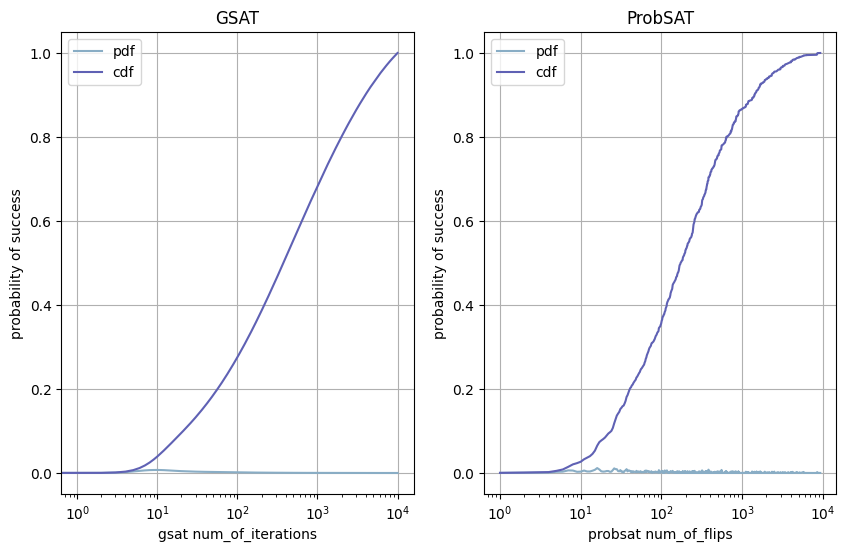

In [86]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 6)

df_gsat.plot(x = 'gsat num_of_iterations', y = ['pdf', 'cdf'], grid = True, ax=axs[0]).\
set(xscale="log", ylabel='probability of success')
axs[0].set_title("GSAT")

df_probsat.plot(x = 'probsat num_of_flips', y = ['pdf', 'cdf'], grid = True, ax=axs[1]).\
set(xscale="log", ylabel='probability of success')
axs[1].set_title("ProbSAT")

#### LogNormal Distribution

In [47]:
gsat_mu = np.log(results[results["gsat num_of_iterations"] != 0]["gsat num_of_iterations"]).mean()
probsat_mu = np.log(results[results["probsat num_of_flips"] != 0]["probsat num_of_flips"]).mean()

gsat_sigma = np.log(results[results["gsat num_of_iterations"] != 0]["gsat num_of_iterations"]).std()
probsat_sigma = np.log(results[results["probsat num_of_flips"] != 0]["probsat num_of_flips"]).std()

nd_df = pd.DataFrame({"algorithm": ["GSAT", "ProbSAT"],
    "mu": np.round([gsat_mu, probsat_mu,], decimals=3),
    "sigma^2": np.round([gsat_sigma**2, probsat_sigma**2], decimals=3)})
nd_df

,algorithm,mu,sigma^2
0,GSAT,5.803,3.558
1,ProbSAT,5.162,2.364


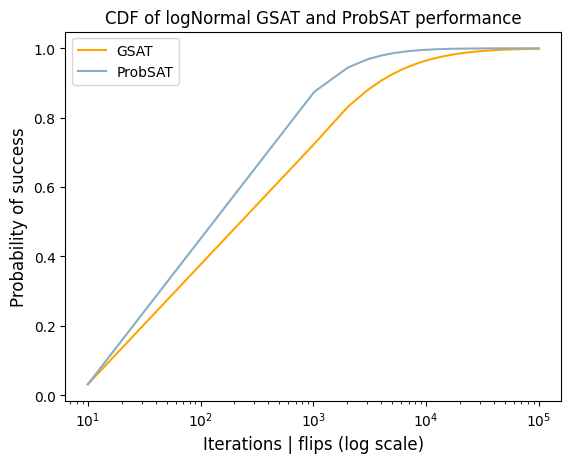

In [82]:
gsat_dist = lognorm(gsat_sigma, 0, np.exp(gsat_mu))
probsat_dist = lognorm(probsat_sigma, 0, np.exp(probsat_mu))

data = np.linspace(10, 100000, 100)
plt.semilogx(data, gsat_dist.cdf(data), label="GSAT", color="orange")
plt.semilogx(data, probsat_dist.cdf(data), label="ProbSAT")

plt.xlabel("Iterations | flips (log scale)", size=12)
plt.ylabel("Probability of success", size=12)
plt.title("CDF of logNormal GSAT and ProbSAT performance")
plt.legend(loc='upper left')